## Use Case

Objective Statement: Get business insight about room occupancy.
    
Challenges: Large size of data, can not maintain by excel spreadsheet. Need several parameters to check at a same time.
    
Methodology / Analytic Technique:Use various EDA methods to get the insight information regarding the features.
    
Business Benefit: Helping Business Development Team to create predictions based on the characteristic for each parameter. 
    
Expected Outcome: Predict whether there are chances of room occupancy or not.

Business Understanding: Occupancy in a hotel is calculated by the number of occupied rooms divided by the number of available rooms that physically exist in a hotel.
                        It is important to understand and predict to make sure that the hotel services are up-to-date and attend every customer equally . 
    
Data Understanding: The dataset has 6 columns and 2665 rows.

Data preparation: Python Version: 3.7.6 
        
Packages: Pandas, Numpy, Matplotlib, Seaborn and Sklearn

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Reading csv file
df = pd.read_csv('file.csv')
df.head() # Displaying top 5 rows

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [3]:
df.shape # Displaying columns

(2665, 6)

In [4]:
df.info() # Showing information about datase

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 125.0 KB


In [5]:
df.describe() # Showing data's statistical features

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [6]:
df.isnull().sum() #Checking for missing values

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [7]:
df.describe().columns #Displaying column names

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [8]:
df['Occupied'] = df['Occupancy'].replace({0: 'No', 1: 'Yes'}) #Transforming data in binary variables to predict

In [9]:
df.head() #Displaying top 5 records

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Occupied
0,23.7000,26.272,585.200000,749.200000,0.004764,1,Yes
1,23.7180,26.290,578.400000,760.400000,0.004773,1,Yes
2,23.7300,26.230,572.666667,769.666667,0.004765,1,Yes
3,23.7225,26.125,493.750000,774.750000,0.004744,1,Yes
4,23.7540,26.200,488.600000,779.000000,0.004767,1,Yes


In [10]:
df['Occupied'].value_counts() # Returns a Series containing the counts of unique values

No     1693
Yes     972
Name: Occupied, dtype: int64

<AxesSubplot:>

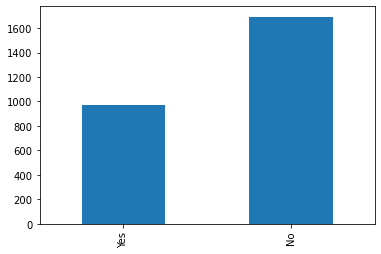

In [11]:
df.Occupied.value_counts().sort_index(ascending=False).plot(kind='bar') 

In [12]:
features=['Temperature','Humidity','Light','CO2','HumidityRatio']
df.groupby('Occupied')[features].mean() # Grouping the data according to the categories and apply a function to the categories

,Temperature,Humidity,Light,CO2,HumidityRatio
Occupied,,,,,
No,20.884211,24.226417,17.332543,547.613497,0.003703
Yes,22.391266,27.317816,499.596132,1014.517585,0.004591


In [13]:
df_features = df[['Temperature','Humidity','Light','CO2','HumidityRatio','Occupied']]

               Temperature  Humidity     Light       CO2  HumidityRatio
Temperature       1.000000  0.716988  0.768428  0.870226       0.894548
Humidity          0.716988  1.000000  0.561905  0.911611       0.951914
Light             0.768428  0.561905  1.000000  0.769167       0.693286
CO2               0.870226  0.911611  0.769167  1.000000       0.964440
HumidityRatio     0.894548  0.951914  0.693286  0.964440       1.000000


<AxesSubplot:>

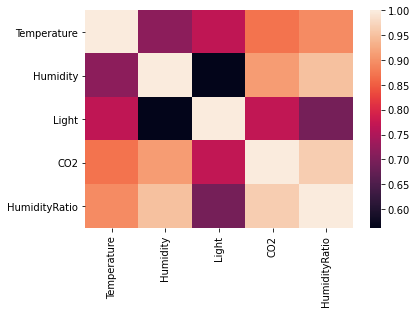

In [14]:
print(df_features.corr()) #Checking correlations between different features
sns.heatmap(df_features.corr())

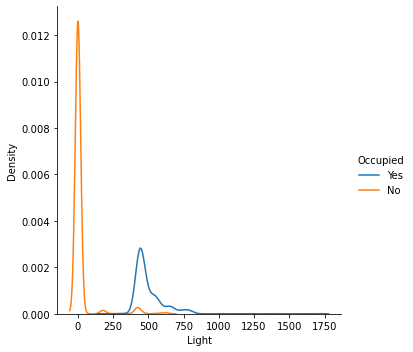

In [15]:
sns.displot(kind = 'kde',x = 'Light', hue = 'Occupied', data = df)

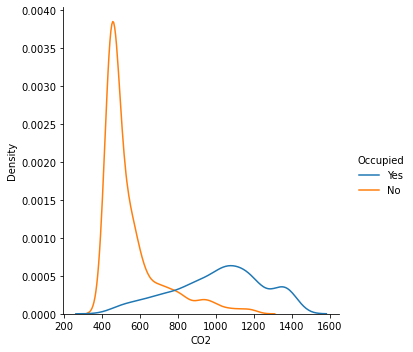

In [16]:
sns.displot(kind = 'kde',x = 'CO2', hue = 'Occupied', data = df)

<AxesSubplot:xlabel='Occupied', ylabel='Light'>

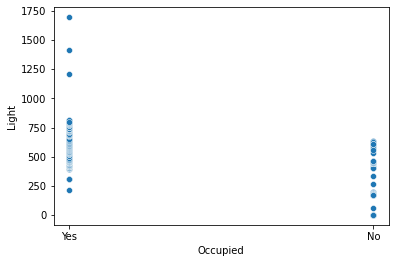

In [17]:
sns.scatterplot(y='Light',x = 'Occupied',data = df)

<AxesSubplot:xlabel='Occupied', ylabel='CO2'>

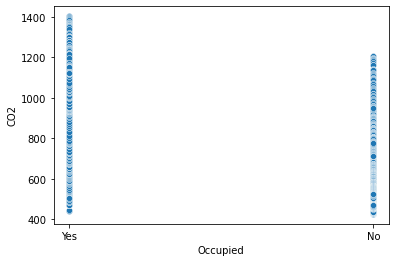

In [18]:
sns.scatterplot(y='CO2',x = 'Occupied',data = df)

<AxesSubplot:xlabel='Light', ylabel='Occupied'>

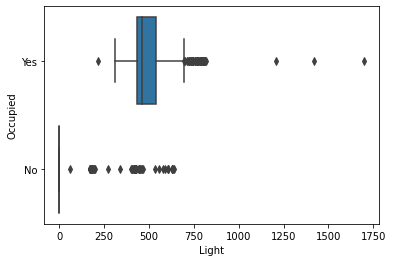

In [19]:
sns.boxplot(x='Light',y='Occupied', data = df)

<AxesSubplot:xlabel='CO2', ylabel='Occupied'>

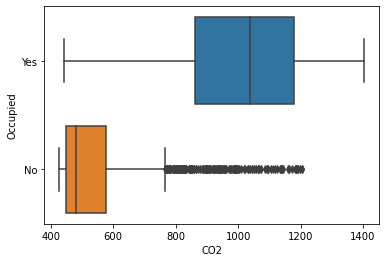

In [20]:
sns.boxplot(x='CO2',y='Occupied', data = df)

In [21]:
x = df.drop(['Occupancy','Occupied'],axis = 1) #Independent variable

In [22]:
y = df.Occupancy #Dependent variable

In [23]:
x.shape

(2665, 5)

In [24]:
y.shape

(2665,)

In [25]:
# Splitting data in training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [26]:
# Building Decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train) #fitting and training the model with traning values
y_pred = model.predict(X_test)

In [27]:
print('Training Accuracy: ', model.score(X_train, y_train)) # Checking accuracy of decision tree classifier
print('Testing Accuracy: ', model.score(X_test, y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.9924953095684803


In [28]:
# Building Random tree classifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rfc.fit(X_train, y_train) #fitting and training the model with traning values
y_pred = rfc.predict(X_test)

In [29]:
print('Training Accuracy: ', rfc.score(X_train, y_train)) # Checking accuracy of random forest classifier
print('Testing Accuracy: ', rfc.score(X_test, y_test))

Training Accuracy:  0.99906191369606
Testing Accuracy:  0.9849906191369606


In [30]:
# Building KNeighbor classifier
knc = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
knc.fit(X_train, y_train) #fitting and training the model with traning values
y_pred = knc.predict(X_test)

In [31]:
print('Training Accuracy: ', knc.score(X_train, y_train)) # Checking accuracy of KNeighors classifier
print('Testing Accuracy: ', knc.score(X_test, y_test))

Training Accuracy:  0.9882739212007504
Testing Accuracy:  0.9793621013133208


In [32]:
# Building Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train) #fitting and training the model with traning values
y_pred = gnb.predict(X_test)

In [33]:
print('Training Accuracy: ', gnb.score(X_train, y_train)) # Checking accuracy of Gaussian Nayes Bias 
print('Testing Accuracy: ', gnb.score(X_test, y_test))

Training Accuracy:  0.9652908067542214
Testing Accuracy:  0.9643527204502814


In [34]:
# Building extreme gradient boost classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train) #fitting and training the model with traning values
y_pred = xgb.predict(X_test)

C:\Users\srusti\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:17:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [35]:
print('Training Accuracy: ', xgb.score(X_train, y_train)) # Checking accuracy of XGboost classifier
print('Testing Accuracy: ', xgb.score(X_test, y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.9887429643527205


## Conclusion

As per the above models we can say, that all the models are performing good. However, decision tree, random forest and extreme gradient boosting classifier are best performing. So, we can use the same model for our predictions.